<h1 align=center><font size = 5>Bike share system investigation</font></h1>

## Introduction

This is the bike share system investigation

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Handling with data](#1)<br>
2. [Descriptive statistic](#2)<br>
3. [Model](#3) <br>


</div>
<hr>

# Content

1. Connect with db2 and first clean 
    * Clean the tripduration < =60s and delect rows with empty tripduration 
    * Change the type on demand 
    * Get the year, month, week for statistic

2. Descriptive statistic
    * Change of the station number and  tripduration range
    * Change of the week and month
    * The popular trip 
    * The difference between customer and subscriber
    * The age range and gender

3. Model
    * Connect with Footsquare
    * Get the top 20 bike station lat,lon in Manhattan
    * Kmeans Cluster and 10 important categories

In [5]:
import numpy as np 

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import csv
import json # library to handle JSON files



# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors



# 1. Handling with data <a id="1"></a> 
      
      1. Clean the tripduration < 60s and delect rows with empty tripduration 
      2. Get the year, month, week for statistic 
      3. Change the type on demand


In [6]:
#import data
df_path = "/Users//Downloads/citibike-tripdata_2016.csv"
data_2016 = pd.read_csv(df_path)

df_path = "/Users//Downloads/citibike-tripdata_2017.csv"
data_2017 = pd.read_csv(df_path)

df_path = "/Users//Downloads/citibike-tripdata_2018.csv"
data_2018 = pd.read_csv(df_path)

df_path = "/Users//Downloads/citibike-tripdata_2019.csv"
data_2019 = pd.read_csv(df_path)

In [7]:
data = pd.concat([data_2016,data_2017,data_2018,data_2019])

In [8]:
#drop the invalid data
data.drop(data[data['tripduration'] <=60].index,inplace=True)
data.drop(data[pd.isna(data['tripduration'])].index,inplace=True)

In [9]:
data['year'] = [i.year for i in list(data['sdate'])]
data['month'] = [i.month for i in list(data['sdate'])]
data['weekday'] = [i.weekday() for i in list(data['sdate'])]

68310348

In [14]:
data.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,sdate,shour,edate,ehour
0,923,268.0,Howard St & Centre St,40.719105,-73.999733,3002.0,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958,1,2016-01-01,00:00:41,2016-01-01,00:16:04
1,379,476.0,E 31 St & 3 Ave,40.743943,-73.979661,498.0,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969,1,2016-01-01,00:00:45,2016-01-01,00:07:04
2,589,489.0,10 Ave & W 28 St,40.750664,-74.001768,284.0,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982,2,2016-01-01,00:00:48,2016-01-01,00:10:37
3,889,268.0,Howard St & Centre St,40.719105,-73.999733,3002.0,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961,2,2016-01-01,00:01:06,2016-01-01,00:15:56
4,1480,2006.0,Central Park S & 6 Ave,40.765909,-73.976342,2006.0,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952,1,2016-01-01,00:01:12,2016-01-01,00:25:52


#### Change the type

In [12]:
#fill NaN to 9999 and float to int
data['birth year'].fillna(9999, inplace=True)
data['birth year'] = [int(i) for i in list(data['birth year'])]


In [15]:
# fill NaN with 0 and float to str
data['start station id'].fillna(0, inplace=True)
data['end station id'].fillna(0, inplace=True)
data['start station id'] = [str(int(i)) for i in list(data['start station id'])]
data['end station id'] = [str(int(i)) for i in list(data['end station id'])]

In [16]:
# fill NaN with 100 and to str
data['gender'].fillna(100, inplace=True)
data['gender'] = [str(int(i)) for i in list(data['gender'])]

In [17]:
# datetime
from datetime import datetime
data['sdate'] = data['sdate'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
data['year'] = [i.year for i in list(data['sdate'])]
data['month'] = [i.month for i in list(data['sdate'])]
data['weekday'] = [i.weekday() for i in list(data['sdate'])]

In [18]:
data.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,sdate,shour,edate,ehour,year,month,weekday
0,923,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958,1,2016-01-01,00:00:41,2016-01-01,00:16:04,2016,1,4
1,379,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969,1,2016-01-01,00:00:45,2016-01-01,00:07:04,2016,1,4
2,589,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982,2,2016-01-01,00:00:48,2016-01-01,00:10:37,2016,1,4
3,889,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961,2,2016-01-01,00:01:06,2016-01-01,00:15:56,2016,1,4
4,1480,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952,1,2016-01-01,00:01:12,2016-01-01,00:25:52,2016,1,4


In [20]:
data.drop(data[pd.isna(data['start station name'])].index,inplace=True)
data.drop(data[pd.isna(data['end station name'])].index,inplace=True)


In [21]:
len(data)


68300047

In [40]:
max(data['tripduration'])
min(data['tripduration'])

61

In [24]:
data.head(2)

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,sdate,shour,edate,ehour,year,month,weekday
0,923,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958,1,2016-01-01,00:00:41,2016-01-01,00:16:04,2016,1,4
1,379,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969,1,2016-01-01,00:00:45,2016-01-01,00:07:04,2016,1,4


# descriptive statstic and Visualization<a id="2"></a>


In [119]:
 
from geopy.geocoders import Nominatim 
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import calendar
import geopandas as gpd

In [63]:
# average time over year or year month 
df_Avg_duration_y = data[['tripduration','year']].groupby(['year']).mean()
print(df_Avg_duration_y)
df_Avg_duration_m = data[['tripduration','year','month']].groupby(['year','month']).mean()
print(df_Avg_duration_m)

      tripduration
year              
2016    959.131607
2017    994.590863
2018    988.475886
2019    978.219362
            tripduration
year month              
2016 1        847.215436
     2        877.099446
     3       1019.784019
     4       1074.349986
     5       1052.515796
     6        989.758037
     7       1000.327859
     8        980.285741
     9        947.343280
     10       925.566657
     11       878.630766
     12       775.976591
2017 1        777.899655
     2        812.876795
     3        789.512548
     4       1085.864928
     5        983.284844
     6       1072.826548
     7       1060.143360
     8       1156.787825
     9        997.079473
     10      1067.895818
     11       892.722019
     12       764.945786
2018 1        826.810807
     2        877.402659
     3        881.996423
     4        970.908631
     5       1121.914174
     6       1211.319580
     7       1074.544032
     8       1010.760351
     9        966.677111
     10    

In [64]:
#reset the index
df_Avg_duration_m = df_Avg_duration_m.reset_index()

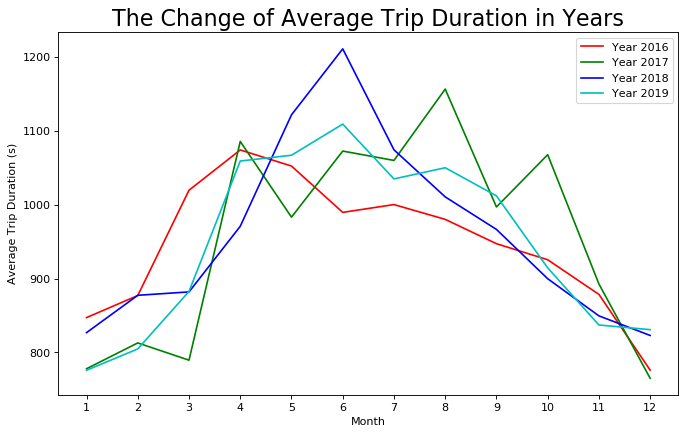

In [110]:
# plot linear line by year
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

xticks = [calendar.month_abbr[i] for i in list(df_Avg_duration_m[df_Avg_duration_m['year'] == 2016]['month'])]
x = np.linspace(1,13,num=12, endpoint=False)
y_2016 = list(df_Avg_duration_m[df_Avg_duration_m['year'] == 2016]['tripduration'])
y_2017 = list(df_Avg_duration_m[df_Avg_duration_m['year'] == 2017]['tripduration'])
y_2018 = list(df_Avg_duration_m[df_Avg_duration_m['year'] == 2018]['tripduration'])
y_2019 = list(df_Avg_duration_m[df_Avg_duration_m['year'] == 2019]['tripduration'])
line1,= plt.plot(x, y_2016,'r',label='line1')
line2, = plt.plot(x, y_2017,color='green',label='line2')
line3, = plt.plot(x, y_2018,color = 'b',label='line3')
line4, = plt.plot(x, y_2019,color='c',label='line4')
plt.xticks(x)


plt.title('The Change of Average Trip Duration in Years',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (s)')
plt.legend([line1, line2, line3,line4], ['Year 2016', 'Year 2017', 'Year 2018','Year 2019'],loc='upper right')

plt.show()



In [ ]:
#add a column for easy descriptive statistic
data['count'] = [1]*len(data)

In [36]:
# the number of station 
Num_2016 = len(data[data['year'] == 2016]['start station name'].unique())
Num_2017 = len(data[data['year'] == 2017]['start station name'].unique())
Num_2018 = len(data[data['year'] == 2018]['start station name'].unique())
Num_2019 = len(data[data['year'] == 2019]['start station name'].unique())
print(Num_2019,Num_2018,Num_2017,Num_2016)

938 821 819 654


In [38]:
# the use frequency
df_usage = data[['month','year','count']].groupby(['year','month']).sum()
print(df_usage.head())

              count
year month         
2016 1       509470
     2       560859
     3       919911
     4      1013149
     5      1212276


In [247]:
df_usage = df_usage.reset_index()
df_usage.head()

,year,month,count
0,2016,1,509470
1,2016,2,560859
2,2016,3,919911
3,2016,4,1013149
4,2016,5,1212276


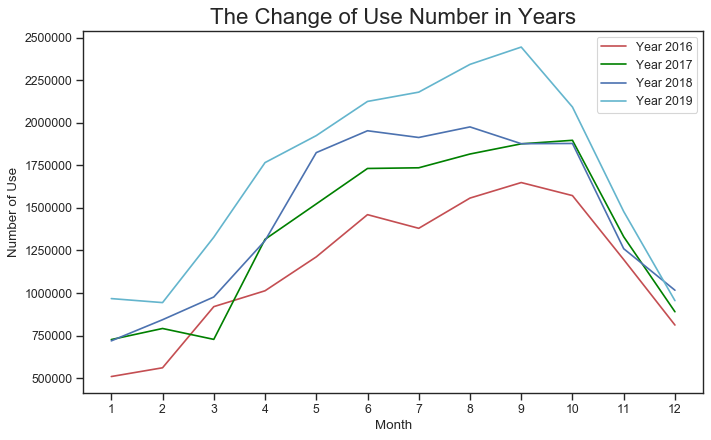

In [248]:
# plot linear line by year about the use count 
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')


x = np.linspace(1,13,num=12, endpoint=False)
y_2016 = list(df_usage[df_usage['year'] == 2016]['count'])
y_2017 = list(df_usage[df_usage['year'] == 2017]['count'])
y_2018 = list(df_usage[df_usage['year'] == 2018]['count'])
y_2019 = list(df_usage[df_usage['year'] == 2019]['count'])
line1, = plt.plot(x, y_2016,'r',label='line1')
line2, = plt.plot(x, y_2017,color='green',label='line2')
line3, = plt.plot(x, y_2018,color = 'b',label='line3')
line4, = plt.plot(x, y_2019,color='c',label='line4')
plt.xticks(x)


plt.title('The Change of Use Number in Years',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Number of Use')
plt.legend([line1, line2, line3,line4], ['Year 2016', 'Year 2017', 'Year 2018','Year 2019'],loc='upper right')

plt.show()

In [112]:
# gender and usertype with year, month
df_usage_gender = data[['month','year','count','gender','tripduration']].groupby(['year','month','gender']).agg(Avg_trip=pd.NamedAgg(column='tripduration', aggfunc=np.mean),Num_trip=pd.NamedAgg(column='count', aggfunc='count'))
df_usage_gender = df_usage_gender.reset_index()
print(df_usage_gender.head())
df_usage_user = data[['month','year','count','usertype','tripduration']].groupby(['year','month','usertype']).agg(Avg_trip=pd.NamedAgg(column='tripduration', aggfunc=np.mean),Num_trip=pd.NamedAgg(column='count', aggfunc='count'))
df_usage_user = df_usage_user.reset_index()
print(df_usage_user.head())



   year  month gender     Avg_trip  Num_trip
0  2016      1      0  2387.678337     25707
1  2016      1      1   728.172056    379307
2  2016      1      2   900.379519    104456
3  2016      2      0  2587.973735     31068
4  2016      2      1   744.926058    417207
   year  month    usertype     Avg_trip  Num_trip
0  2016      1    Customer  2468.593245     24543
1  2016      1  Subscriber   765.154681    484927
2  2016      2    Customer  2668.311012     29822
3  2016      2  Subscriber   776.508505    531037
4  2016      3    Customer  2550.952733     93237


In [352]:
df_usage_gender.head()

,year,month,gender,Avg_trip,Num_trip
0,2016,1,0,2387.678337,25707
1,2016,1,1,728.172056,379307
2,2016,1,2,900.379519,104456
3,2016,2,0,2587.973735,31068
4,2016,2,1,744.926058,417207


In [44]:
# usertype and weekday
df_weekday_user = data[['weekday','count','usertype','tripduration']].groupby(['weekday','usertype']).agg(Avg_trip=pd.NamedAgg(column='tripduration', aggfunc=np.mean),Num_trip=pd.NamedAgg(column='count', aggfunc='sum'))
print(df_weekday_user.head())


                       Avg_trip  Num_trip
weekday usertype                         
0       Customer    2276.381088    936500
        Subscriber   787.662881   8796226
1       Customer    2308.544785    808405
        Subscriber   780.752654   9612197
2       Customer    2381.818965    823950


In [245]:
#2019 dat
data_2019 = data[data['year']==2019]
data_2019.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,sdate,shour,edate,ehour,year,month,weekday,count,location,borough
0,320,3160,Central Park West & W 76 St,40.778968,-73.973747,3283,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1,2019-01-01,00:01:47,2019-01-01,00:07:07,2019,1,1,1,"40.77896784,-73.97374737",Central Park West
1,316,519,Pershing Square North,40.751873,-73.977706,518,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,2019-01-01,00:04:43,2019-01-01,00:10:00,2019,1,1,1,"40.751872999999996,-73.97770600000003",NaN
2,591,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,2019-01-01,00:06:03,2019-01-01,00:15:55,2019,1,1,1,"40.78524672,-73.97667321",NaN
3,2719,504,1 Ave & E 16 St,40.732219,-73.981656,3709,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,2019-01-01,00:07:03,2019-01-01,00:52:22,2019,1,1,1,"40.73221853,-73.98165557",NaN
4,303,229,Great Jones St,40.727434,-73.993790,503,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1,2019-01-01,00:07:35,2019-01-01,00:12:39,2019,1,1,1,"40.72743423,-73.99379025",NaN


In [253]:
data_2019[['tripduration']].describe()


,tripduration
count,2.054902e+07
mean,9.782194e+02
std,1.055264e+04
min,6.100000e+01
25%,3.620000e+02
50%,6.150000e+02
75%,1.079000e+03
max,3.812666e+06


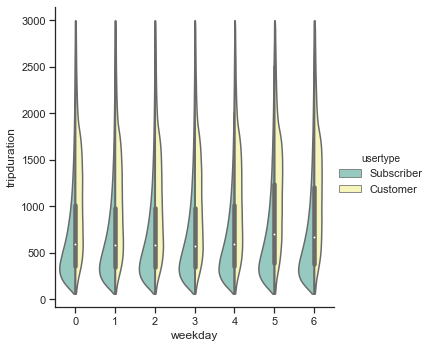

In [255]:
#violin shape plot to see the comparasion of usertype ,consider the extreme value
sns.set(style="ticks")

sns.catplot(x="weekday", y="tripduration", hue="usertype",kind="violin", split=True, data=data_2019[data_2019['tripduration']<3000],cut=0,palette="Set3");

In [138]:
data_2019['location'] = data_2019['start station latitude'].astype(str)+','+data_2019['start station longitude'].astype(str)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
## because the services has limit ,so get the unique location information
location_unique = list(data_2019['location'].unique())

In [171]:
# get borough of bike station 
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='NY')
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

borough = []

for loc in location_unique:
    sub = str(geolocator.reverse(loc))
    borough.append(sub.split(', ')[2])

borough

['Boerum Hill Historic District',
 'A. Phillip Randolph Houses',
 'West 68th Street',
 'Carnegie Hill',
 'Manhattan',
 'Greenpoint',
 'New York',
 'Bushwick']

In [173]:
NY_borough = borough

In [181]:
#groupby location
df_2019 = data_2019[['location','count']].groupby(['location']).sum()
df_2019 = df_2019.reset_index()           
            
  
    

In [184]:
# give the borough name with help of location information
for i,j in zip(location_unique,NY_borough):
    for index,loc in enumerate(df_2019['location']):
        if i == loc:
            df_2019.loc[index,'borough'] = j

In [186]:
# count number of station in a borough and sorted the station number
df_borough_sum = df_2019[['count','borough']].groupby(['borough']).sum()
df_borough_sum = df_borough_sum.reset_index()

In [196]:
df_borough_sum = df_borough_sum.sort_values(by='count', ascending=False).reset_index(drop=True)
df_borough_sum

,borough,count
0,Manhattan,1464549
1,Chelsea,1051847
2,East Village,842913
3,Greenpoint,586634
4,Times Square,566920
5,Lower East Side,499532
6,Washington Square Village,495184
7,Williamsburg,487056
8,West Village,472495
9,Murray Hill,464782


In [218]:
# get the lat ,lon of borough 
geolocator = Nominatim(user_agent="NY_borough")


geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

df_borough_lat_lon = df_borough_sum['borough'].apply(geocode)

In [220]:
#rearrange the type
df_lat_lon = df_borough_lat_lon.apply(lambda location: [location.latitude, location.longitude])

In [221]:
df_lat_lon

0                     [40.7896239, -73.9598939]
1                      [51.4875417, -0.1682205]
2                     [40.7292688, -73.9873613]
3                     [40.7237134, -73.9509714]
4      [40.757280550000004, -73.98585503545917]
5                     [40.7159357, -73.9868057]
6                     [40.7280556, -73.9977778]
7             [37.27892105, -76.69448606443117]
8                       [40.7341857, -74.00558]
9                     [38.2903476, -85.5882941]
10                     [40.7076124, -74.009378]
11                    [40.7870455, -73.9754163]
12                    [40.7153802, -74.0093063]
13                    [40.7644228, -73.9923918]
14                    [40.7410722, -73.9896534]
15                    [40.7359091, -73.9901626]
16                    [40.7110166, -74.0169369]
17                    [40.7251022, -73.9795833]
18                    [40.6701033, -73.9859723]
19            [40.73185095, -73.97778222585569]
20                    [40.7258746, -73.9

In [243]:
#plot the geo map with the number of station
from folium import plugins
NY_location = [40.730610,-73.935242]
# let's start again with a clean copy of the map of New York
ny_map = folium.Map(location = NY_location, zoom_start = 14,title = 'Mapbox Bright')

#station density layers
station_density = plugins.MarkerCluster().add_to(ny_map)

# loop through the dataframe and add each data point to the mark cluster
for location, label, in zip(df_lat_lon, df_borough_sum['count']):
    folium.CircleMarker(
        location=location,
        icon=None,
        popup=label,
        radius= label/10000,
        color="#007849",
    ).add_to(station_density)

# display map
ny_map

In [259]:
#the first ten trip in 2019
df_popular_trip = data_2019[['start station name','end station name','count']].groupby(['start station name','end station name']).sum().reset_index().sort_values(by='count', ascending=False).reset_index(drop=True)

In [260]:
df_popular_trip.head(10)

,start station name,end station name,count
0,E 7 St & Avenue A,Cooper Square & Astor Pl,8426
1,Central Park S & 6 Ave,Central Park S & 6 Ave,6776
2,Central Park S & 6 Ave,5 Ave & E 88 St,6091
3,North Moore St & Greenwich St,Vesey Pl & River Terrace,5364
4,West Drive & Prospect Park West,West Drive & Prospect Park West,5363
5,Vesey Pl & River Terrace,North Moore St & Greenwich St,5274
6,12 Ave & W 40 St,West St & Chambers St,5055
7,Pershing Square North,E 24 St & Park Ave S,5051
8,McGuinness Blvd & Eagle St,Vernon Blvd & 50 Ave,4999
9,Soissons Landing,Soissons Landing,4969


# The Segment analysis <a id="3"></a>

### Because Manhattan has the largest number of station ,so investigate the top endstation nearby information

In [277]:

df_2019.head()

,location,count,borough
0,"40.65539977447831,-74.01062786579129",2843,Sunset Park
1,"40.65708866668485,-74.00870203971863",5348,Industry City
2,"40.6610633719006,-73.97945255041121",32250,Park Slope
3,"40.6627059,-73.9569115",3261,Crown Heights
4,"40.6630619,-73.95387459999998",5483,Flatbush


In [281]:
# get the top 20 bike docks
df_top_20 = df_2019[df_2019['borough'] == 'Manhattan'].sort_values(by='count', ascending=False).head(20)

In [284]:
df_top_20 = df_top_20.reset_index(drop= True)

In [297]:
# give the address of bike station
geolocator = Nominatim(user_agent='NY_address')
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)

address = []

for loc in df_top_20['location']:
    sub = str(geolocator.reverse(loc))
    address.append(sub.split(', ')[0]+sub.split(', ')[1])

In [299]:
df_top_20['address'] = address

In [353]:
# connect with foursquare
import requests
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [317]:
def getNearbyVenues(names, latitudes, longitudes, radius=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Bike Station', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [306]:
df_top_20['latitude'] = df_top_20['location'].apply(lambda x: x.split(',')[0])
df_top_20['longtide'] = df_top_20['location'].apply(lambda x: x.split(',')[1])
df_top_20

,location,count,borough,address,latitude,longtide
0,"40.76087502,-74.00277668",99278,Manhattan,Citi Bike - 12 Ave & W 40 St12th Avenue,40.76087502,-74.00277668
1,"40.746745000000004,-74.007756",96971,Manhattan,Citi Bike - W 20 St & 11 AveWest 20th Street,40.746745000000004,-74.007756
2,"40.76590936,-73.97634151",75571,Manhattan,Citi Bike - Central Park S & 6 AveCenter Drive,40.76590936,-73.97634151
3,"40.746646999999996,-73.993915",67948,Manhattan,Citi Bike - W 27 St & 7 AveWest 27th Street,40.746646999999996,-73.993915
4,"40.74734825,-73.99723551",67819,Manhattan,Citi Bike - W 26 St & 8 Ave8th Avenue,40.74734825,-73.99723551
5,"40.74322681432173,-73.97449783980845",65490,Manhattan,East 33 StreetKips Bay,40.74322681432173,-73.97449783980845
6,"40.76019252,-73.9912551",63316,Manhattan,Citi Bike - 9 Ave & W 45 St9th Avenue,40.76019252,-73.9912551
7,"40.7734066,-73.97782542",53920,Manhattan,Adventure PlaygroundCentral Park West,40.7734066,-73.97782542
8,"40.77282817,-73.96685276",53133,Manhattan,9125th Avenue,40.77282817,-73.96685276
9,"40.77632142182271,-73.96427392959596",40200,Manhattan,9695th Avenue,40.77632142182271,-73.96427392959596


In [318]:
manhattan_venues = getNearbyVenues(names=df_top_20['address'],
                                   latitudes=df_top_20['latitude'],
                                   longitudes=df_top_20['longtide']
                                  )



Citi Bike - 12 Ave & W 40 St12th Avenue
Citi Bike - W 20 St & 11 AveWest 20th Street
Citi Bike - Central Park S & 6 AveCenter Drive
Citi Bike - W 27 St & 7 AveWest 27th Street
Citi Bike - W 26 St & 8 Ave8th Avenue
East 33 StreetKips Bay
Citi Bike - 9 Ave & W 45 St9th Avenue
Adventure PlaygroundCentral Park West
9125th Avenue
9695th Avenue
W 67th St & BroadwayWest 67th Street
Lafayette StreetLittle Italy
455West 56th Street
201West 70th Street
Thelonius Monk CircleUpper West Side
1278th Avenue
Citi Bike - E 55 St & 2 AveEast 55th Street
Harlem-125th StreetPark Avenue
12195th Avenue
Ford FoundationEast 43rd Street


In [319]:
print(manhattan_venues.shape)
manhattan_venues.head()

(424, 7)


,Bike Station,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Citi Bike - 12 Ave & W 40 St12th Avenue,40.76087502,-74.00277668,West Side Highway Running Path,40.762031,-74.001066,Track
1,Citi Bike - 12 Ave & W 40 St12th Avenue,40.76087502,-74.00277668,La Barca Cantina,40.761934,-74.003408,Lounge
2,Citi Bike - 12 Ave & W 40 St12th Avenue,40.76087502,-74.00277668,River Place Sports Club,40.761211,-74.000716,Gym
3,Citi Bike - 12 Ave & W 40 St12th Avenue,40.76087502,-74.00277668,North River Lobster Company,40.762083,-74.002505,Seafood Restaurant
4,Citi Bike - 12 Ave & W 40 St12th Avenue,40.76087502,-74.00277668,Pier 61,40.759419,-74.003373,Park


In [320]:
manhattan_venues.groupby('Bike Station').count()

,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Bike Station,,,,,,
12195th Avenue,13,13,13,13,13,13
1278th Avenue,18,18,18,18,18,18
201West 70th Street,22,22,22,22,22,22
455West 56th Street,13,13,13,13,13,13
9125th Avenue,18,18,18,18,18,18
9695th Avenue,11,11,11,11,11,11
Adventure PlaygroundCentral Park West,8,8,8,8,8,8
Citi Bike - 12 Ave & W 40 St12th Avenue,22,22,22,22,22,22
Citi Bike - 9 Ave & W 45 St9th Avenue,43,43,43,43,43,43


In [321]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 147 uniques categories.


In [322]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Bike Station'] = manhattan_venues['Bike Station'] 

# move Bike station column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Bike Station,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Athletics & Sports,Bagel Shop,Bakery,Bank,Bar,Bike Rental / Bike Share,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Bridge,Burger Joint,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Fast Food Restaurant,Field,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gift Shop,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Laser Tag,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Perfume Shop,Pet Store,Pharmacy,Physical Therapist,Piano Bar,Pie Shop,Pizza Place,Playground,Plaza,Pub,Recreation Center,Restaurant,River,Salad Place,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Skate Park,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Steakhouse,Storage Facility,Strip Club,Supplement Shop,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Track,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Citi Bike - 12 Ave & W 40 St12th Avenue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Citi Bike - 12 Ave & W 40 St12th Avenue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Citi Bike - 12 Ave & W 40 St12th Avenue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Citi Bike - 12 Ave & W 40 St12th Avenue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Citi Bike - 12 Ave & W 40 St12th Avenue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [323]:
manhattan_onehot.shape

(424, 148)

In [324]:
manhattan_grouped = manhattan_onehot.groupby('Bike Station').mean().reset_index()
manhattan_grouped

,Bike Station,American Restaurant,Antique Shop,Arepa Restaurant,Art Gallery,Art Museum,Athletics & Sports,Bagel Shop,Bakery,Bank,Bar,Bike Rental / Bike Share,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Bridge,Burger Joint,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Fast Food Restaurant,Field,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gift Shop,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Laser Tag,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Perfume Shop,Pet Store,Pharmacy,Physical Therapist,Piano Bar,Pie Shop,Pizza Place,Playground,Plaza,Pub,Recreation Center,Restaurant,River,Salad Place,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Skate Park,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Steakhouse,Storage Facility,Strip Club,Supplement Shop,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Track,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,12195th Avenue,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.00,0.000000,0.000000,0.000000,0.076923,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.00000,0.000,0.00000,0.000000,0.000000,0.00000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1278th Avenue,0.055556,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.0000

In [325]:
manhattan_grouped.shape

(20, 148)

In [327]:
num_top_venues = 5

for hood in manhattan_grouped['Bike Station']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Bike Station'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----12195th Avenue----
            venue  freq
0            Café  0.23
1           Plaza  0.15
2        Fountain  0.15
3          Garden  0.08
4  History Museum  0.08


----1278th Avenue----
                 venue  freq
0  American Restaurant  0.06
1       Ice Cream Shop  0.06
2          Pizza Place  0.06
3         Cycle Studio  0.06
4         Cupcake Shop  0.06


----201West 70th Street----
                      venue  freq
0                  Wine Bar  0.09
1        Italian Restaurant  0.09
2       American Restaurant  0.05
3  Mediterranean Restaurant  0.05
4         French Restaurant  0.05


----455West 56th Street----
            venue  freq
0     Coffee Shop  0.15
1   Deli / Bodega  0.08
2  Ice Cream Shop  0.08
3        Pharmacy  0.08
4      Donut Shop  0.08


----9125th Avenue----
            venue  freq
0            Café  0.11
1  Clothing Store  0.11
2     Snack Place  0.11
3        Boutique  0.06
4      Playground  0.06


----9695th Avenue----
                venue  freq
0      

In [328]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [329]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Bike Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
station_venues_sorted = pd.DataFrame(columns=columns)
station_venues_sorted['Bike Station'] = manhattan_grouped['Bike Station']

for ind in np.arange(manhattan_grouped.shape[0]):
    station_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

station_venues_sorted.head()

,Bike Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12195th Avenue,Café,Fountain,Plaza,History Museum,Garden,Pharmacy,Art Museum,Deli / Bodega,Indian Restaurant,Dessert Shop
1,1278th Avenue,American Restaurant,Gym / Fitness Center,Cycle Studio,Cupcake Shop,Ice Cream Shop,Physical Therapist,Pizza Place,Coffee Shop,Mexican Restaurant,Seafood Restaurant
2,201West 70th Street,Wine Bar,Italian Restaurant,Yoga Studio,Grocery Store,Park,Mediterranean Restaurant,Wine Shop,Ice Cream Shop,Hot Dog Joint,Frozen Yogurt Shop
3,455West 56th Street,Coffee Shop,Cupcake Shop,Greek Restaurant,Pharmacy,Ice Cream Shop,Donut Shop,Food Truck,Caribbean Restaurant,Lounge,Deli / Bodega
4,9125th Avenue,Clothing Store,Café,Snack Place,American Restaurant,Boutique,Italian Restaurant,Men's Store,Outdoor Sculpture,Park,Playground


In [333]:

from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

manhattan_grouped_clustering = manhattan_grouped.drop('Bike Station', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1], dtype=int32)

In [342]:
manhattan_merged = df_top_20
manhattan_merged.columns = ['location', 'count', 'borough', 'Bike Station', 'latitude', 'longtide']

In [344]:
# add clustering labels
station_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)



# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(station_venues_sorted.set_index('Bike Station'), on='Bike Station')

manhattan_merged.head() # check the last columns!

,location,count,borough,Bike Station,latitude,longtide,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"40.76087502,-74.00277668",99278,Manhattan,Citi Bike - 12 Ave & W 40 St12th Avenue,40.76087502,-74.00277668,2,Boat or Ferry,Seafood Restaurant,Bus Station,Gym,Bus Line,Park,Lounge,Bowling Alley,Music Venue,Athletics & Sports
1,"40.746745000000004,-74.007756",96971,Manhattan,Citi Bike - W 20 St & 11 AveWest 20th Street,40.746745000000004,-74.007756,0,Art Gallery,Gym / Fitness Center,Yoga Studio,Recreation Center,Café,Clothing Store,Coffee Shop,Golf Driving Range,Harbor / Marina,Laser Tag
2,"40.76590936,-73.97634151",75571,Manhattan,Citi Bike - Central Park S & 6 AveCenter Drive,40.76590936,-73.97634151,1,Hotel,Park,American Restaurant,Nature Preserve,Dog Run,Italian Restaurant,Sandwich Place,Outdoor Sculpture,Spa,Steakhouse
3,"40.746646999999996,-73.993915",67948,Manhattan,Citi Bike - W 27 St & 7 AveWest 27th Street,40.746646999999996,-73.993915,1,Coffee Shop,Indie Theater,Sandwich Place,Café,Martial Arts Dojo,Flower Shop,Burger Joint,French Restaurant,Smoke Shop,Miscellaneous Shop
4,"40.74734825,-73.99723551",67819,Manhattan,Citi Bike - W 26 St & 8 Ave8th Avenue,40.74734825,-73.99723551,1,Thai Restaurant,Coffee Shop,Yoga Studio,Storage Facility,Health & Beauty Service,Gym,Martial Arts Dojo,Nail Salon,Deli / Bodega,Convenience Store


In [346]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[40.758896, -73.985130], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['latitude'], manhattan_merged['longtide'], manhattan_merged['Bike Station'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Check the characters of bike station

In [347]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,count,longtide,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,96971,-74.007756,0,Art Gallery,Gym / Fitness Center,Yoga Studio,Recreation Center,Café,Clothing Store,Coffee Shop,Golf Driving Range,Harbor / Marina,Laser Tag


In [348]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,count,longtide,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,75571,-73.97634151,1,Hotel,Park,American Restaurant,Nature Preserve,Dog Run,Italian Restaurant,Sandwich Place,Outdoor Sculpture,Spa,Steakhouse
3,67948,-73.993915,1,Coffee Shop,Indie Theater,Sandwich Place,Café,Martial Arts Dojo,Flower Shop,Burger Joint,French Restaurant,Smoke Shop,Miscellaneous Shop
4,67819,-73.99723551,1,Thai Restaurant,Coffee Shop,Yoga Studio,Storage Facility,Health & Beauty Service,Gym,Martial Arts Dojo,Nail Salon,Deli / Bodega,Convenience Store
5,65490,-73.97449783980845,1,Mexican Restaurant,Pharmacy,Bank,Café,Garden,Coffee Shop,Greek Restaurant,Pizza Place,College Cafeteria,Bar
6,63316,-73.9912551,1,Coffee Shop,Bakery,Bar,Burger Joint,Theater,Wine Shop,Gift Shop,New American Restaurant,Latin American Restaurant,Mexican Restaurant
7,53920,-73.97782542,1,Playground,American Restaurant,Outdoors & Recreation,Garden,Clothing Store,Skate Park,Italian Restaurant,Dessert Shop,Diner,Dive Bar
8,53133,-73.96685276,1,Clothing Store,Café,Snack Place,American Restaurant,Boutique,Italian Restaurant,Men's Store,Outdoor Sculpture,Park,Playground
9,40200,-73.96427392959596,1,Hotel,Bakery,Playground,Sculpture Garden,Bridge,Boutique,Bookstore,Park,Art Gallery,History Museum
10,39998,-73.98266566,1,Italian Restaurant,American Restaurant,Café,Indie Movie Theater,Concert Hall,Theater,Plaza,Cosmetics Shop,Movie Theater,Gym
11,39946,-73.99600982666016,1,Coffee Shop,Italian Restaurant,Café,Shoe Store,Dive Bar,Restaurant,Pizza Place,Cupcake Shop,Paper / Office Supplies Store,Outdoor Supply Store


In [349]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,count,longtide,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,99278,-74.00277668,2,Boat or Ferry,Seafood Restaurant,Bus Station,Gym,Bus Line,Park,Lounge,Bowling Alley,Music Venue,Athletics & Sports
